<a href="https://colab.research.google.com/github/Himanshu069/ML-mini-projects_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [ ]:
dataset = datasets.MNIST(root='data/', download=True)
print(len(dataset))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5343055.05it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 154128.82it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1471348.86it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8659331.26it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

60000


label: 3


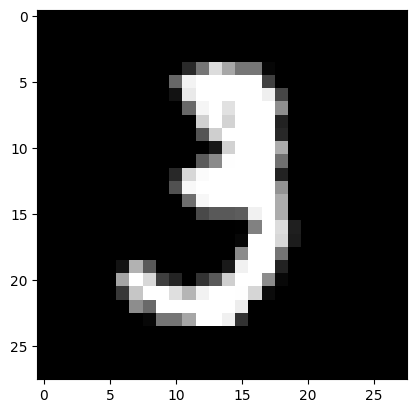

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('label:', label)

In [ ]:
#converting images to tensor using ToTensor
mnist_dataset = datasets.MNIST(root = 'data/', train= True, transform = transforms.ToTensor())
print(mnist_dataset)
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5


tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


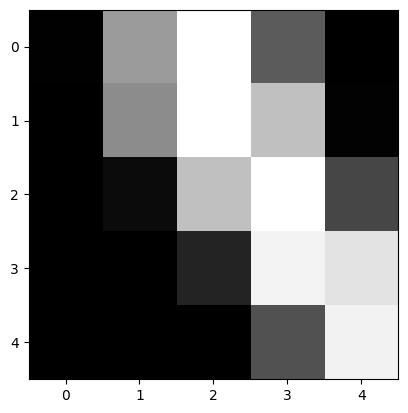

In [ ]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))
plt.imshow(image_tensor[0,10:15,10:15], cmap = 'gray')

In [ ]:
train_data, validation_data = random_split(mnist_dataset, [50000,10000])
print("length of Train Datasets:", len(train_data))
print("length of Validation Datasets:", len(validation_data))

length of Train Datasets: 50000
length of Validation Datasets: 10000


In [ ]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(validation_data, batch_size, shuffle=False)


In [ ]:
input_size = 28 * 28
num_classes = 10

#logistic regression model
#model = nn.Linear(input_size, num_classes)
#print(model.weight.shape)
#print(model.weight)
#print(model.bias.shape)
#print(model.bias)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    print(xb)
    out = self.linear(xb)
    print(out)
    return(out)
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return(loss)

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return ({'val_loss':loss, 'val_acc':acc})

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc']for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return({'val_loss': epoch_loss.item(),'val_acc': epoch_acc.item()})

  def epoch_end(self, epoch,result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch,result['val_loss'], result['val_acc']))
model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0082, -0.0331, -0.0310,  ..., -0.0301,  0.0137, -0.0111],
         [-0.0253,  0.0334, -0.0062,  ..., -0.0263,  0.0213,  0.0197],
         [ 0.0199, -0.0080,  0.0040,  ..., -0.0163, -0.0003, -0.0313],
         ...,
         [-0.0026,  0.0302,  0.0005,  ..., -0.0215,  0.0261, -0.0290],
         [-0.0348, -0.0008,  0.0167,  ...,  0.0194, -0.0045, -0.0172],
         [-0.0261,  0.0079, -0.0303,  ..., -0.0072, -0.0125, -0.0059]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0251,  0.0269, -0.0066,  0.0036,  0.0007, -0.0199,  0.0308, -0.0292,
         -0.0209, -0.0321], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break
print('outputs shape:', outputs.shape)
print('Sample :\n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.1038, -0.0181,  0.3191,  ...,  0.2569, -0.2561, -0.2018],
        [ 0.1048, -0.1253, -0.0570,  ...,  0.1100,  0.0860,  0.1296],
        [ 0.0658, -0.0332, -0.1635,  ...,  0.1308, -0.0280, -0.3604],
        ...,
        [-0.1093, -0.1746,  0.0899,  ...,  0.1677, -0.2050,  0.0954],
        [ 0.1389, -0.0687, -0.0398,  ...,  0.1894,  0.0087,  0.0686],
        [ 0.3579, -0.0327, -0.0288,  ...,  0.1896, -0.2024, -0.0211]],
       grad_fn=<AddmmBackward0>)
outputs shape: torch.Size([128, 10])
Sample :
 tensor([[ 0.1038, -0.0181,  0.3191,  0.0218, -0.0803,  0.1171, -0.0276,  0.2569,
         -0.2561, -0.2018],
        [ 0.1048, -0.1253, -0.0570, -0.0631, -0.0211,  0.0330,  0.0207,  0.1100,
          0.0860,  0.1296]])


In [ ]:
probs = F.softmax(outputs, dim=1)

print("Sampe probabilities:\n", probs[:2].data)

print("\n")
print("Sum:", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sampe probabilities:
 tensor([[0.1067, 0.0945, 0.1324, 0.0983, 0.0888, 0.1082, 0.0936, 0.1244, 0.0745,
         0.0786],
        [0.1083, 0.0860, 0.0921, 0.0916, 0.0955, 0.1008, 0.0996, 0.1089, 0.1063,
         0.1110]])


Sum: 0.9999999403953552


tensor([2, 9, 7, 7, 1, 7, 7, 4, 1, 7, 4, 7, 0, 7, 7, 7, 7, 3, 7, 7, 7, 4, 0, 1,
        3, 4, 0, 3, 7, 7, 0, 4, 7, 0, 0, 4, 7, 5, 0, 7, 4, 7, 7, 0, 5, 7, 7, 3,
        7, 7, 3, 6, 6, 0, 0, 7, 3, 7, 3, 7, 8, 4, 7, 0, 7, 0, 7, 7, 6, 3, 0, 7,
        7, 7, 6, 7, 4, 7, 7, 7, 7, 7, 2, 5, 3, 7, 4, 7, 7, 0, 7, 7, 6, 6, 0, 0,
        7, 0, 7, 7, 0, 4, 7, 7, 4, 0, 3, 3, 7, 7, 7, 7, 7, 7, 3, 2, 7, 4, 7, 7,
        2, 7, 3, 3, 7, 5, 7, 0])


tensor([0.1324, 0.1110, 0.1162, 0.1344, 0.1299, 0.1198, 0.1762, 0.1236, 0.1183,
        0.1309, 0.1171, 0.1649, 0.1342, 0.1279, 0.1216, 0.1214, 0.1124, 0.1318,
        0.1627, 0.1256, 0.1124, 0.1228, 0.1245, 0.1152, 0.1208, 0.1200, 0.1117,
        0.1413, 0.1201, 0.1227, 0.1177, 0.1473, 0.1139, 0.1298, 0.1273, 0.11

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return(torch.tensor(torch.sum(preds == labels).item()/len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function:", loss_fn)
print("\n")

loss= loss_fn(outputs, labels)
print(loss)


Accuracy:  tensor(0.1328)


Loss Function: <function cross_entropy at 0x7996cc133eb0>


tensor(2.3054, grad_fn=<NllLossBackward0>)


In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    #training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #valication phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return(history)

In [ ]:
result0 = evaluate(model, val_loader)
result0

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-0.1105, -0.2891,  0.2592,  ...,  0.2858, -0.2525, -0.2716],
        [ 0.0701, -0.1960,  0.0567,  ...,  0.4141, -0.0404, -0.2308],
        [ 0.1090, -0.0799, -0.1408,  ...,  0.0626,  0.0124, -0.2091],
        ...,
        [ 0.1366,  0.0223, -0.0088,  ...,  0.2373, -0.0447, -0.1161],
        [ 0.2020,  0.0619, -0.1619,  ..., -0.2763, -0.2181, -0.2102],
        [-0.0234, -0.0253, -0.1977,  ..., -0.0315,  0.0638, -0.2562]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0938,  0.0417

{'val_loss': 2.3132903575897217, 'val_acc': 0.08524525165557861}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader,val_loader )
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)

history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]



Streaming output truncated to the last 5000 lines.
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-2.6843e+00,  1.1948e+00, -4.6696e-01,  ...,  3.0860e+00,
         -4.5522e-01,  1.6918e+00],
        [-8.2924e-01, -4.5410e+00,  2.9882e+00,  ..., -7.7188e-01,
          1.3751e+00,  8.2778e-01],
        [-1.8079e+00,  3.0404e+00,  3.5657e-03,  ..., -1.3835e+00,
          1.8130e+00, -6.8809e-01],
        ...,
        [-6.1412e-01, -5.4806e-01,  4.0635e-02,  ..., -1.9025e+00,
          3.8014e-01, -1.1540e+00],
        [-1.3165e+00,  3.1498e+00,  1.3472e+00,  ..., -2.5455e+00,
          2.2385e+00, -1.5352e+00],
        [ 2.6633e+00, -1.9054e+00,  1.5864e-01,  ...,  1.0912e+00,
         -1.7319e+00, -9.1343e-01]], grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.

[0.08524525165557861, 0.847804605960846, 0.8487935066223145, 0.850375771522522, 0.8516613841056824, 0.8524525165557861, 0.8531447649002075, 0.8544303774833679, 0.8552215099334717, 0.8560126423835754, 0.857594907283783, 0.8585838675498962, 0.8596716523170471, 0.8602650165557861, 0.8610561490058899, 0.8616495132446289, 0.8622428774833679, 0.8624406456947327, 0.8630340099334717, 0.8637262582778931, 0.8642207384109497]


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

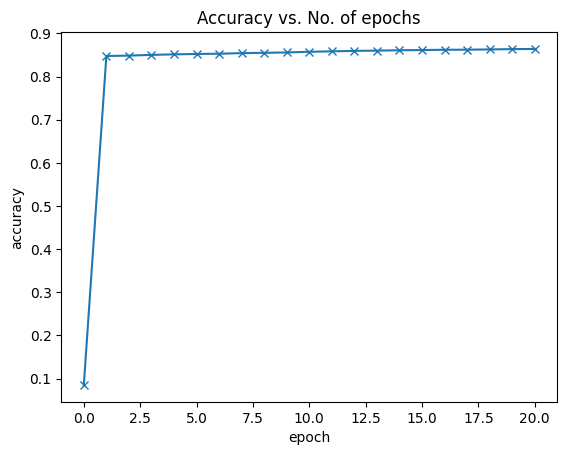

In [ ]:
accuracies = [result['val_acc'] for result in history]
print(accuracies)
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [ ]:
#random_testing
test_dataset = datasets.MNIST(root = ' data/', download = True, train = False, transform = transforms.ToTensor())




tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

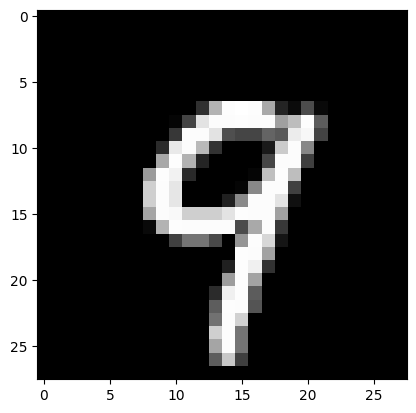

In [ ]:
def predict_image(img, model):
  xb = img
  yb = model(xb)
  _, preds = torch.max(yb, dim = 1)
  return (preds[0].item())

img, label = test_dataset[12]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))